In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Loading the dataset 
data = pd.read_csv("/Users/zahiramohammed/Desktop/DAPM_dataset_new.csv")

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               500 non-null    int64  
 1   age                  500 non-null    float64
 2   hypertension         500 non-null    int64  
 3   heart_disease        500 non-null    int64  
 4   smoking_history      500 non-null    int64  
 5   bmi                  500 non-null    float64
 6   HbA1c_level          500 non-null    float64
 7   blood_glucose_level  500 non-null    float64
 8   diabetes             500 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [61]:
# Weights
weights = [0.1, 0.15, 0.15, 0.15,0.15, 0.15, 0.15]

In [62]:
# Function to calculate weighted Euclidean distance
def weighted_euclidean_distance(x, y, weights):
    squared_diff = [(xi - yi) ** 2 * w for xi, yi, w in zip(x, y, weights)]
    return np.sqrt(sum(squared_diff))

In [63]:
# Normalize continuous variables  
scaler = StandardScaler()
cont_variables = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
scaled = scaler.fit_transform(data[cont_variables])
data[cont_variables] = scaled

In [64]:
# Calculate the dissimilarity matrix using weighted Euclidean distance
data = data.sample(25, random_state=10) #choosing random 25 samples to make visualization easy. 
dissimilarity_matrix = np.zeros((len(data), len(data)))
for i in range(len(data)):
    for j in range(len(data)):
        x = data.iloc[i, 2:].values  
        y = data.iloc[j, 2:].values  
        dissimilarity_matrix[i][j] = weighted_euclidean_distance(x, y, weights)
dissimilarity_matrix

array([[0.        , 1.02333214, 0.80692783, 0.98896623, 1.06810849,
        0.37105032, 1.12689651, 0.96556887, 0.7800535 , 0.97746222,
        0.90655074, 0.56303903, 1.26270504, 0.87964489, 1.37179536,
        0.94925224, 1.78698644, 0.81834892, 0.96267147, 0.83770462,
        1.30179713, 1.09307232, 0.97533042, 1.37960419, 0.43331369],
       [1.02333214, 0.        , 1.41466327, 0.92535592, 1.27576911,
        1.24402369, 0.68437952, 1.02820187, 0.71916639, 0.84801079,
        0.70870716, 1.0832519 , 1.03916731, 0.55520759, 1.42640585,
        0.93416823, 0.9894496 , 0.64774653, 1.11105227, 1.23307146,
        0.88692961, 1.53336459, 0.67568069, 0.86458389, 1.31329996],
       [0.80692783, 1.41466327, 0.        , 1.40635213, 1.5652796 ,
        0.71558011, 1.1602526 , 1.25147767, 1.10736935, 1.50499516,
        1.08990887, 1.13691097, 1.61489687, 1.37249215, 0.85321702,
        0.97926168, 1.80712653, 1.16940883, 1.66114599, 0.85993951,
        1.82825147, 0.35673954, 1.18369323, 1.

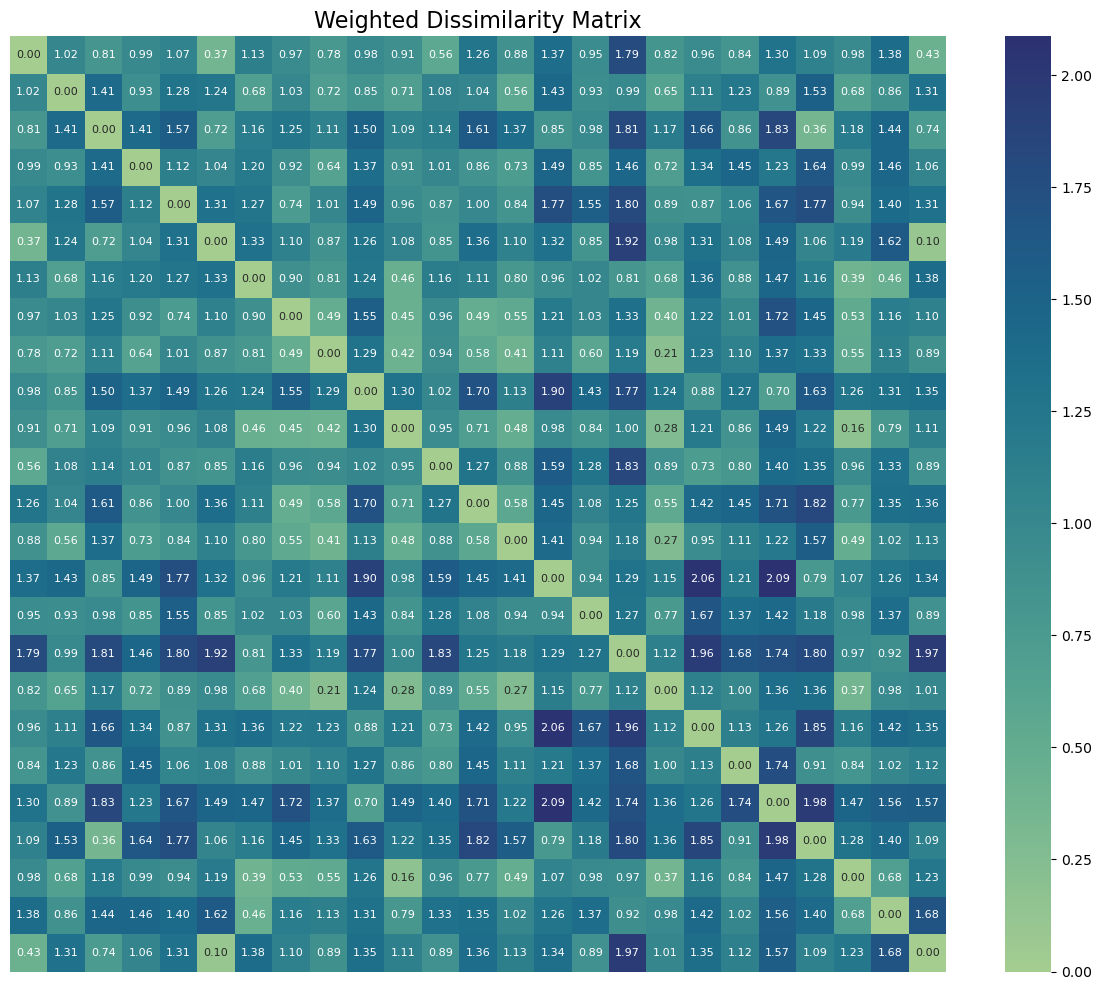

In [65]:
fig, ax = plt.subplots(figsize=(12,10))
#sns.heatmap(dissimilarity_matrix, annot=True, cmap="YlGnBu", xticklabels=False, yticklabels=False,ax=ax)
sns.heatmap(dissimilarity_matrix, annot=True, cmap="crest",  
            xticklabels=False, yticklabels=False, ax=ax,
            fmt=".2f", annot_kws={"size": 8})
plt.title("Weighted Dissimilarity Matrix", size= 16)
fig.tight_layout()
plt.show()